A notebook for loading files and drawing graphs

In [1]:
import pickle
import seaborn as sns

sns.set(context='talk')

%matplotlib inline

In [2]:
ceasefire_df = pd.read_csv('../data/go_events/ceasefire_chronology.csv', parse_dates=['Date'])
start_date = ceasefire_df.Date[0]
real_dates = set(ceasefire_df.Date[1:])

In [3]:
real_dates = set(x.date() for x in real_dates)

In [4]:
real_dates

{datetime.date(2016, 4, 10),
 datetime.date(2016, 4, 11),
 datetime.date(2016, 4, 14),
 datetime.date(2016, 5, 9),
 datetime.date(2016, 5, 12),
 datetime.date(2016, 5, 19),
 datetime.date(2016, 5, 24),
 datetime.date(2016, 5, 25),
 datetime.date(2016, 5, 26)}

## Telegram

### whereistheboom

In [5]:
res = pickle.load(open('../data/pickles/results_whereistheboom.pkl', 'rb'))

In [6]:
df = res['arima']['1D']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

count    4.000000
mean     1.442775
std      4.077294
min     -3.060000
25%     -0.637650
50%      1.061850
75%      3.142275
max      6.707400
Name: resid, dtype: float64

count    180.000000
mean      -0.162371
std        4.891707
min      -11.736300
25%       -3.110025
50%       -0.384600
75%        1.913675
max       19.834600
Name: resid, dtype: float64

         dates       lb    resid       ub status  abs_resid
74  2016-01-21  14.9629  19.8346  24.7063  False    19.8346
58  2016-01-05  13.4359  18.3076  23.1793  False    18.3076
54  2016-01-01   9.2246  14.0963  18.9680  False    14.0963
159 2016-04-15   7.7763  12.6480  17.5197  False    12.6480
169 2016-04-25 -16.6080 -11.7363  -6.8646  False    11.7363
167 2016-04-23   6.7991  11.6708  16.5425  False    11.6708
161 2016-04-17 -16.4964 -11.6247  -6.7530  False    11.6247
0   2015-11-08   5.8588  10.7305  15.6022  False    10.7305
92  2016-02-08 -15.4803 -10.6086  -5.7369  False    10.6086
61  2016-01-08 -15.4041 -10.5324  -5.6

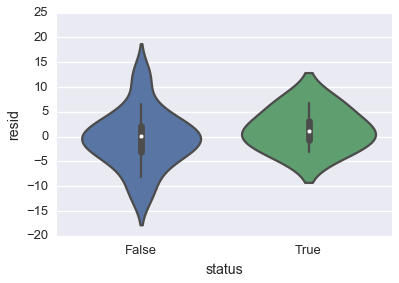

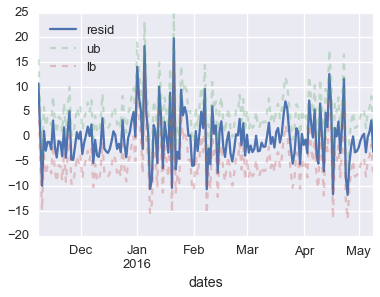

In [7]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

### yementodaychannl

In [8]:
res = pickle.load(open('../data/pickles/results_yementodaychannl.pkl', 'rb'))

In [9]:
df = res['arima']['1D']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

count     3.000000
mean      1.077800
std      19.957724
min     -19.773700
25%      -8.384250
50%       3.005200
75%      11.503550
max      20.001900
Name: resid, dtype: float64

count    122.000000
mean       0.076411
std        8.065178
min      -29.863400
25%       -2.752625
50%        0.152500
75%        3.156775
max       24.323700
Name: resid, dtype: float64

         dates       lb    resid       ub status  abs_resid
117 2016-04-12 -38.2254 -29.8634 -21.5015  False    29.8634
98  2016-03-24 -34.8452 -26.4833 -18.1214  False    26.4833
110 2016-04-05  15.9618  24.3237  32.6856  False    24.3237
93  2016-03-19  12.1987  20.5606  28.9225  False    20.5606
116 2016-04-11  11.6400  20.0019  28.3638   True    20.0019
115 2016-04-10 -28.1356 -19.7737 -11.4118   True    19.7737
118 2016-04-13 -26.4822 -18.1203  -9.7584  False    18.1203
107 2016-04-02   9.5558  17.9177  26.2796  False    17.9177
108 2016-04-03   8.5100  16.8719  25.2338  False    16.8719
122 2016-04-17 -24.9513 -16.58

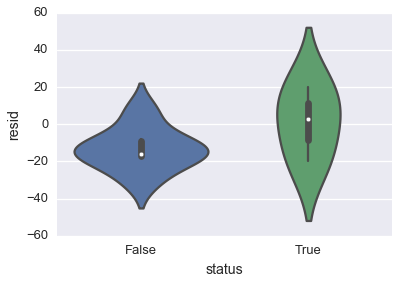

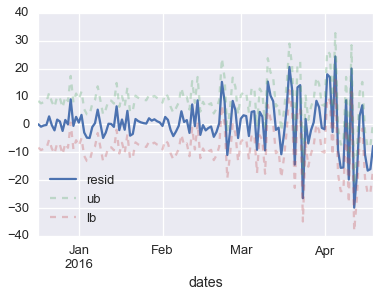

In [10]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

## Twitter

In [11]:
res = pickle.load(open('../data/pickles/results_yemen_tweet_5_22.pkl', 'rb'))

In [12]:
df = res['arima']['1D']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

count       3.000000
mean     -563.573133
std      1334.845438
min     -1817.717400
25%     -1265.102100
50%      -712.486800
75%        63.499000
max       839.484800
Name: resid, dtype: float64

count       29.000000
mean       230.969362
std       4001.890551
min      -8527.915400
25%      -3201.394700
50%        159.366500
75%       2120.163000
max      10947.570200
Name: resid, dtype: float64

        dates          lb       resid          ub status   abs_resid
12 2016-05-03   7121.9201  10947.5702  14773.2202  False  10947.5702
17 2016-05-08   5110.2776   8935.9277  12761.5777  False   8935.9277
19 2016-05-10 -12353.5654  -8527.9154  -4702.2653  False   8527.9154
1  2016-04-22   1980.8816   5806.5317   9632.1817  False   5806.5317
0  2016-04-21  -8336.4808  -4510.8307   -685.1807  False   4510.8307
13 2016-05-04  -7344.6583  -3519.0082    306.6418  False   3519.0082
25 2016-05-16  -7252.1270  -3426.4770    399.1731  False   3426.4770
24 2016-05-15  -7252.1270  -3426.4770    399.1

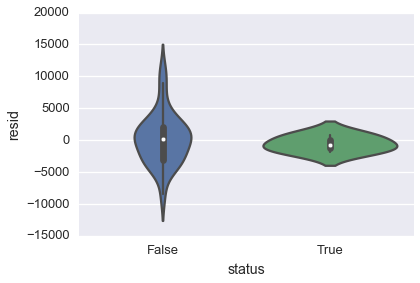

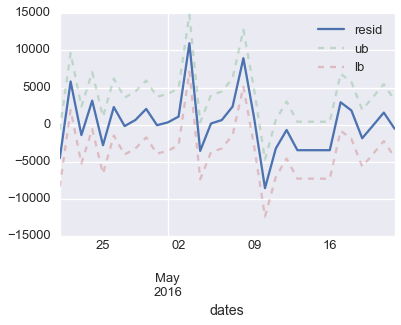

In [13]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

In [14]:
df = res['arima']['1H']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

count     72.000000
mean      -7.021674
std      115.416482
min     -373.897300
25%      -38.389250
50%      -13.262750
75%       33.442575
max      321.380700
Name: resid, dtype: float64

count    674.000000
mean       0.886350
std      115.341112
min     -713.908400
25%      -49.290750
50%       -2.174900
75%       40.527350
max      599.179300
Name: resid, dtype: float64

                  dates        lb     resid        ub status  abs_resid
73  2016-04-24 21:00:00 -829.2030 -713.9084 -598.6139  False   713.9084
407 2016-05-08 19:00:00  483.8848  599.1793  714.4739  False   599.1793
406 2016-05-08 18:00:00  483.5190  598.8135  714.1081  False   598.8135
287 2016-05-03 19:00:00  479.6561  594.9506  710.2452  False   594.9506
408 2016-05-08 20:00:00 -678.0126 -562.7181 -447.4235  False   562.7181
192 2016-04-29 20:00:00  388.1140  503.4086  618.7031  False   503.4086
289 2016-05-03 21:00:00 -586.6008 -471.3063 -356.0117  False   471.3063
618 2016-05-17 14:00:00  346.5889  461.8835  5

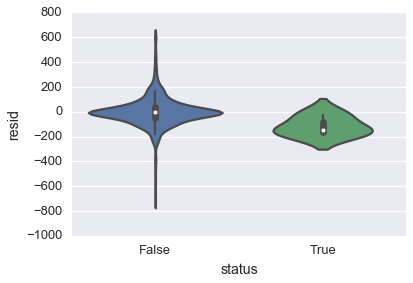

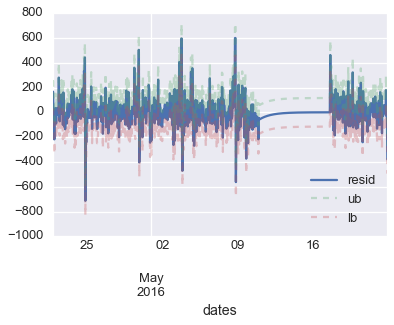

In [15]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

## Instagram

### User posts

In [16]:
res = pickle.load(open('../data/pickles/results_yemen_user_posts_shrunk.pkl', 'rb'))

In [17]:
df = res['arima']['1D']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

# This last two values look waaaaay broken, so I'm dropping them.
#df = df.iloc[:-2, :]

count      6.000000
mean    -230.224700
std      217.724956
min     -586.429600
25%     -263.330850
50%     -216.429300
75%     -186.753975
max       93.766900
Name: resid, dtype: float64

count    2046.000000
mean        5.115017
std       222.182628
min     -4756.380000
25%       -24.842275
50%        -0.049850
75%        34.126625
max      2699.398700
Name: resid, dtype: float64

          dates         lb      resid         ub status  abs_resid
2051 2016-05-21 -4978.8610 -4756.3800 -4533.8989  False  4756.3800
1742 2015-07-17  2476.9176  2699.3987  2921.8797  False  2699.3987
1388 2014-07-28  1639.1502  1861.6313  2084.1123  False  1861.6313
2050 2016-05-20 -1830.4164 -1607.9353 -1385.4543  False  1607.9353
1959 2016-02-19   985.0017  1207.4827  1429.9638  False  1207.4827
1456 2014-10-04   900.8117  1123.2927  1345.7738  False  1123.2927
1713 2015-06-18 -1213.5357  -991.0546  -768.5736  False   991.0546
1514 2014-12-01   690.3050   912.7861  1135.2672  False   912.7861
2013 2016-0

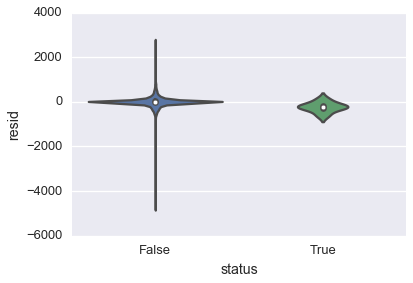

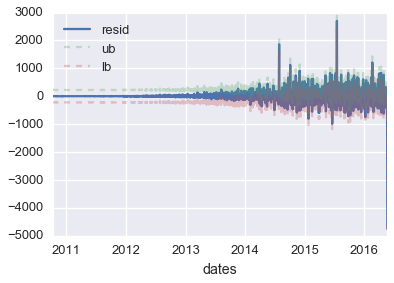

In [18]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

# sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.violinplot(data=df, y='resid', x='status')

sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

In [19]:
df.resid.tail()

2047    -448.7544
2048      78.4699
2049    -184.0382
2050   -1607.9353
2051   -4756.3800
Name: resid, dtype: float64

In [20]:
df = res['arima']['6H']['result']['df']
df['status'] = df.dates.isin(real_dates)
df['abs_resid'] = np.absolute(df.resid)

count     24.000000
mean     -68.423871
std      284.634806
min     -534.584300
25%     -292.180275
50%      -80.216250
75%      191.605750
max      355.378400
Name: resid, dtype: float64

count    8183.000000
mean        0.259456
std       129.357651
min     -1293.714500
25%       -19.550750
50%        -0.001900
75%        17.708650
max      1258.510200
Name: resid, dtype: float64

                   dates         lb      resid         ub status  abs_resid
6972 2015-07-18 00:00:00 -1423.8117 -1293.7145 -1163.6172  False  1293.7145
6969 2015-07-17 06:00:00  1128.4129  1258.5102  1388.6074  False  1258.5102
6968 2015-07-17 00:00:00   955.1364  1085.2337  1215.3310  False  1085.2337
8206 2016-05-21 12:00:00 -1139.2694 -1009.1722  -879.0749  False  1009.1722
7248 2015-09-25 00:00:00 -1134.9904 -1004.8931  -874.7959  False  1004.8931
6267 2015-01-22 18:00:00   857.5644   987.6617  1117.7589  False   987.6617
6803 2015-06-05 18:00:00   734.0050   864.1023   994.1995  False   864.1023
6272 2

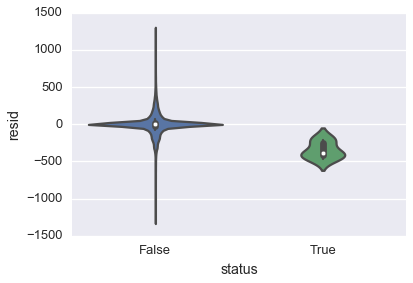

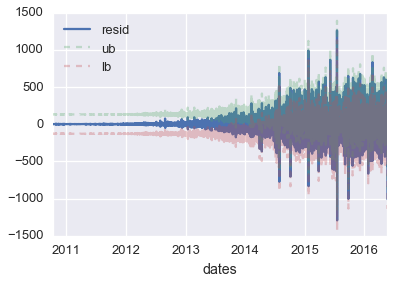

In [21]:
print(df.loc[df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.loc[~df.dates.apply(lambda x: x.date() in real_dates), 'resid'].describe())
print()
print(df.sort_values('abs_resid', ascending=False).head(10))

# sns.violinplot(data=df.loc[df.dates >= start_date, :], y='resid', x='status')
sns.violinplot(data=df, y='resid', x='status')

sns.despine()

fig, ax = plt.subplots()
df.plot(x='dates', y='resid', ax=ax)
df.plot(x='dates', y='ub', ax=ax, ls='--', alpha=0.3)
df.plot(x='dates', y='lb', ax=ax, ls='--', alpha=0.3)
sns.despine()

## Regional Instagram

In [23]:
res_list = pickle.load(open('../data/pickles/results_yemen_zone_arimas.pkl', 'rb'))

In [25]:
dfs = [x['arima']['1D']['result']['df'] for x in res_list]
for i in range(len(dfs)):
    dfs[i]['status'] = dfs[i].dates.isin(real_dates)
    dfs[i]['abs_resid'] = np.absolute(dfs[i].resid)

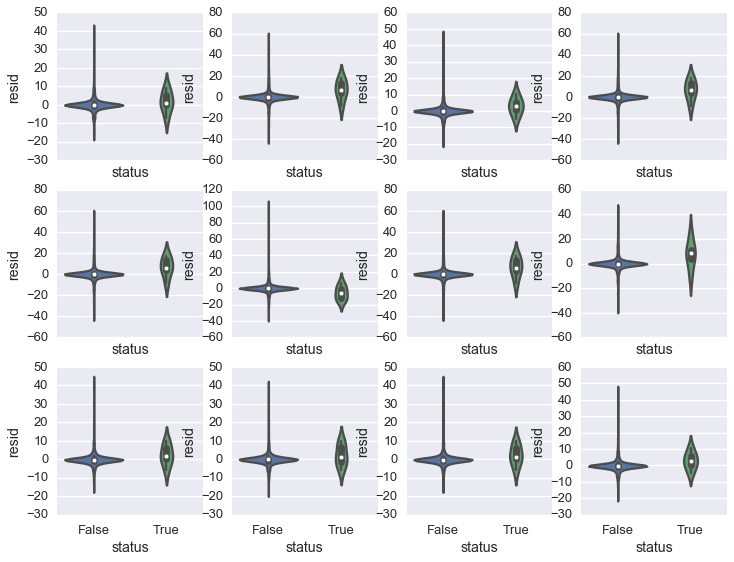

In [32]:
f, axarr = plt.subplots(3, 4, figsize=(12, 9), sharex=True)
sns.violinplot(data=dfs[0], y='resid', x='status', ax=axarr[0, 0])
sns.violinplot(data=dfs[1], y='resid', x='status', ax=axarr[0, 1])
sns.violinplot(data=dfs[2], y='resid', x='status', ax=axarr[0, 2])
sns.violinplot(data=dfs[3], y='resid', x='status', ax=axarr[0, 3])
sns.violinplot(data=dfs[4], y='resid', x='status', ax=axarr[1, 0])
sns.violinplot(data=dfs[5], y='resid', x='status', ax=axarr[1, 1])
sns.violinplot(data=dfs[6], y='resid', x='status', ax=axarr[1, 2])
sns.violinplot(data=dfs[7], y='resid', x='status', ax=axarr[1, 3])
sns.violinplot(data=dfs[8], y='resid', x='status', ax=axarr[2, 0])
sns.violinplot(data=dfs[9], y='resid', x='status', ax=axarr[2, 1])
sns.violinplot(data=dfs[10], y='resid', x='status', ax=axarr[2, 2])
sns.violinplot(data=dfs[11], y='resid', x='status', ax=axarr[2, 3])

sns.despine()

In [70]:
(dfs[0].dates == pd.to_datetime('2016-04-10').date()).value_counts()

False    1293
True        1
Name: dates, dtype: int64

In [76]:
dfs[0].index

RangeIndex(start=0, stop=1294, step=1)

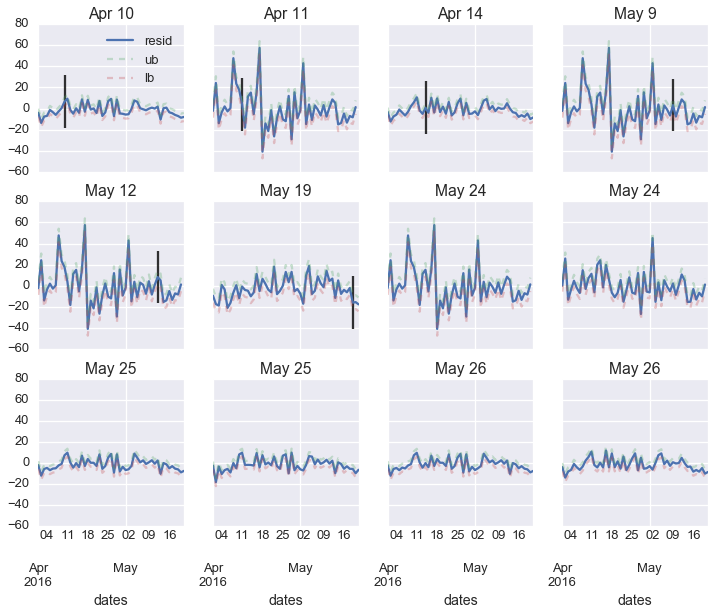

In [98]:

f, axarr = plt.subplots(3, 4, figsize=(12, 9), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        df = dfs[i*4+j]
        cur_ax = axarr[i][j]
        df.loc[df.dates >= pd.to_datetime('2016-04-01'), :].plot(x='dates', y='resid', ax=cur_ax)
        df.loc[df.dates >= pd.to_datetime('2016-04-01'), :].plot(x='dates', y='ub', ax=cur_ax, ls='--', alpha=0.3)
        df.loc[df.dates >= pd.to_datetime('2016-04-01'), :].plot(x='dates', y='lb', ax=cur_ax, ls='--', alpha=0.3)
        
        x_pos = ceasefire_df.loc[i*4+j+1, 'Date'].date()
        cur_ax.vlines(x_pos,
                      df.loc[df.dates == x_pos, 'resid'] - 25, 
                      df.loc[df.dates == x_pos, 'resid'] + 25,
                      color='black', alpha=0.8, linestyle='-')
        
        cur_ax.set_title(x_pos.strftime('%b %-d'))
        if i != 0 or j != 0:
            cur_ax.legend_.remove()

In [48]:
pd.to_datetime('2016-04-01')

Timestamp('2016-04-01 00:00:00')

In [28]:
for df in dfs:
    print (df.status.value_counts())

False    1288
True        6
Name: status, dtype: int64
False    1302
True        6
Name: status, dtype: int64
False    1288
True        6
Name: status, dtype: int64
False    1302
True        6
Name: status, dtype: int64
False    1302
True        6
Name: status, dtype: int64
False    1288
True        6
Name: status, dtype: int64
False    1302
True        6
Name: status, dtype: int64
False    1302
True        6
Name: status, dtype: int64
False    1278
True        6
Name: status, dtype: int64
False    1288
True        6
Name: status, dtype: int64
False    1278
True        6
Name: status, dtype: int64
False    1288
True        6
Name: status, dtype: int64
